Part of EDA is understanding the relationship between two (or more variables).

In this notebook, we'll continue exploring the Palmer Penguins dataset and learn tools for looking at relationships between variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
penguins = pd.read_csv('data/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Like in the single-variable case, the tool we use depends on the type of the variables we are examining.

## Examining Two Categorical Variables

What if we want to look at a cross-tabulation of the number of observations of each sex broken down by species. 

For this, we can use the `pandas` `crosstab` function. What we need to do is to pass in the two columns we want to create the table based on.

In [5]:
pd.crosstab(penguins['island'], penguins['species'])

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


We can take the results and create a plot.

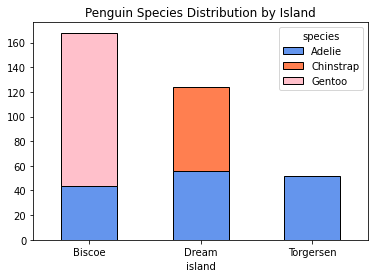

In [6]:
pd.crosstab(penguins['island'], penguins['species']).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['cornflowerblue', 'coral', 'pink'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars
plt.title('Penguin Species Distribution by Island')                   # add a title
plt.xticks(rotation = 0);                                             # change the appearance of the x tick labels

You can also normalize the cross-tabulation. Since we are working with two variables here, we can normalize in a number of ways. 

For example, if we just want the proportion of total observations that are contained in each cell, we can use the `normalize = 'all'` option.

In [7]:
pd.crosstab(penguins['island'], penguins['species'],  normalize = 'all')

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,0.127907,0.000000,0.360465
Dream,0.162791,0.197674,0.000000
Torgersen,0.151163,0.000000,0.000000


Or if we want proportions by row, we can use the `normalize = 'index'` option.

In [8]:
pd.crosstab(penguins['island'], penguins['species'],  normalize = 'index')

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,0.261905,0.000000,0.738095
Dream,0.451613,0.548387,0.000000
Torgersen,1.000000,0.000000,0.000000


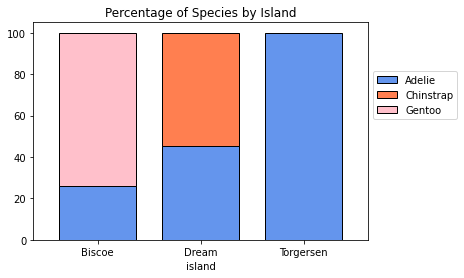

In [9]:
(pd.crosstab(penguins['island'], penguins['species'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        color = ['cornflowerblue', 'coral', 'pink'],
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('Percentage of Species by Island')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');   # move the legend to the right side of the plot

## Categorical-Numeric Combinations

Let's say we want to look at the average body mass by species. One way to do this is to use `.groupby`.

Quite often when using `.groupby()`, our goal is to calculate an aggregate value by group. To use `.groupby()`, we need to tell pandas: 
* **what** to group by
* **which** column (or columns) we want to aggregate
* **how** to aggregate

In this case, we want to group by `species` and then aggregate the `body_mass_g` column by taking the _mean_.

In [10]:
penguins.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

You can even use `.describe` with `groupby` to get even more information by species.

In [11]:
penguins.groupby('species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


**Question:** Looking at the summary statistics by group, what do you notice?

We can easily compare distributions using a grouped boxplot.

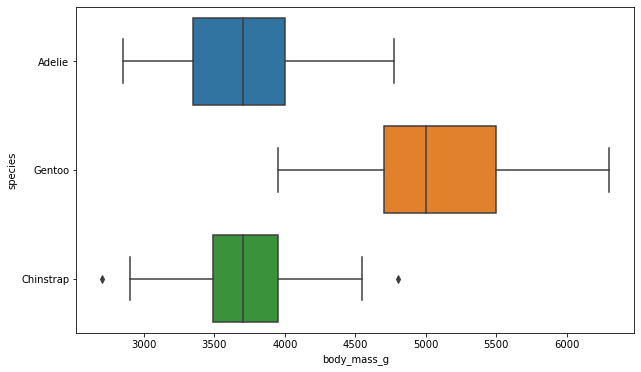

In [12]:
plt.figure(figsize = (10,6))

sns.boxplot(data = penguins,
           x = 'body_mass_g',
           y = 'species');

## Comparing Two Numeric Variables

One way to assess the relationship between two numeric variables is to find the correlation. This can be accomplished using the `.corr()` method, which returns the correlation matrix.

In [13]:
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


**Question:** Do you notice anything interesting when inspecting the correlation values?

Let's investigate the relationship between bill length and bill depth. We can do this using a scatterplot.

First, let's use the `.plot` method from pandas.

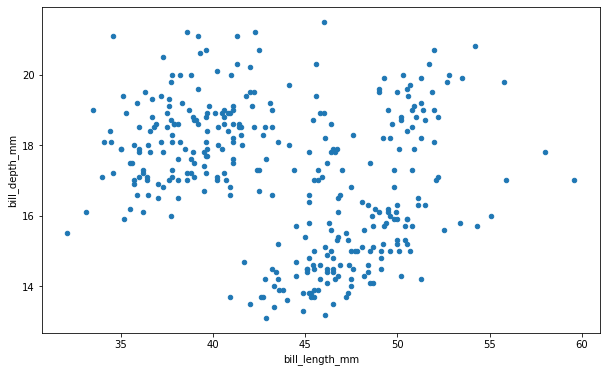

In [14]:
penguins.plot(kind = 'scatter',
             x = 'bill_length_mm',
             y = 'bill_depth_mm',
             figsize = (10,6));

We do need to remember that we have multiple species of penguins. To get a better understanding of the relationship between these variables, we could color the points by species. The easiest way to do this is using the _seaborn_ library.

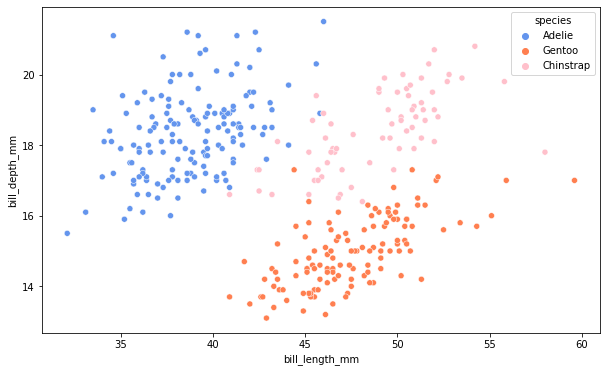

In [15]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = penguins,
               x = 'bill_length_mm',
               y = 'bill_depth_mm',
               hue = 'species',
               palette = ['cornflowerblue', 'coral', 'pink']);